# MCMC algoriths

**1- Metropolis hastings vs Rejet**

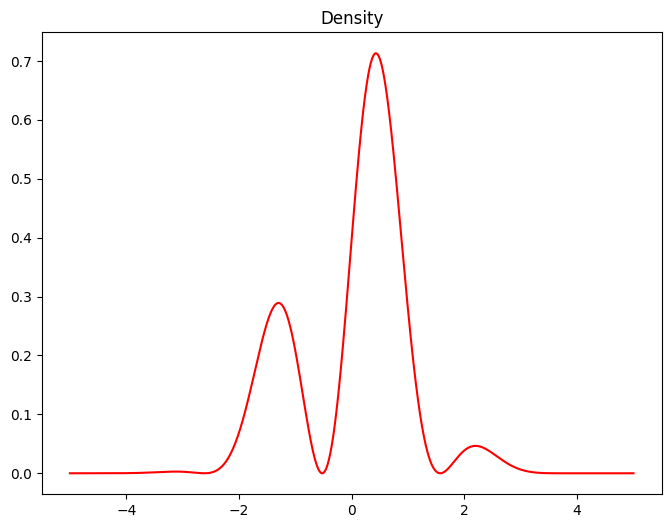

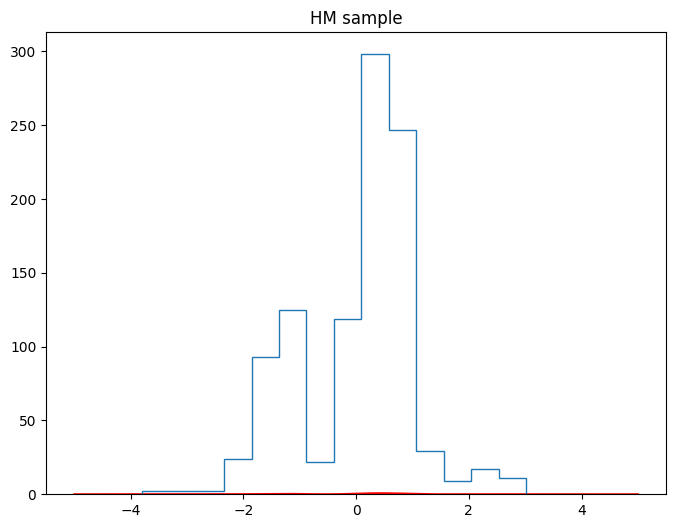

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import scipy.stats as sps
from time import time
rcParams['figure.figsize'] = 8, 6

alpha=3.
Mplot=5.
n=int(1e3)
Nsteps=20
sigma=1.

mT=alpha*np.exp(-.5*alpha**2)

def f(x):
    return sps.norm.pdf(x)*(1+np.sin(alpha*x))   #sps.norm is a continous normal dist

def rho(x,y):
    return f(y)*sps.norm.pdf(y,loc=x,scale=sigma)/(f(x)*sps.norm.pdf(x,loc=y,scale=sigma))  #loc is the mean and scale is the std

    # rho is the qotion with Q normally dist


def quotient(x):
    return 1+np.sin(alpha*x)

plt.figure()
x=np.linspace(-Mplot,Mplot,int(1e4))
y=f(x)
plt.plot(x,y,"r")
plt.title("Density")
plt.show()

def HM():
    x=np.random.randn()
    for i in range(Nsteps):
        u=np.random.rand()
        Y=x+sigma*np.random.randn()
        if u<rho(x,Y):
            x=Y
    return x

Ech=[]
t = time()
for i in range(n):
    Ech.append(HM())
tempsHM=time()-t

mHM=np.mean(Ech)
eHM=1.96*np.std(Ech)/np.sqrt(n)

plt.figure()
x=np.linspace(-Mplot,Mplot,int(1e4))
y=f(x)
plt.plot(x,y,"r")
plt.hist(Ech, bins=int(round(n**.38)), histtype="step") #,normed=1
plt.title("HM sample")
plt.show()



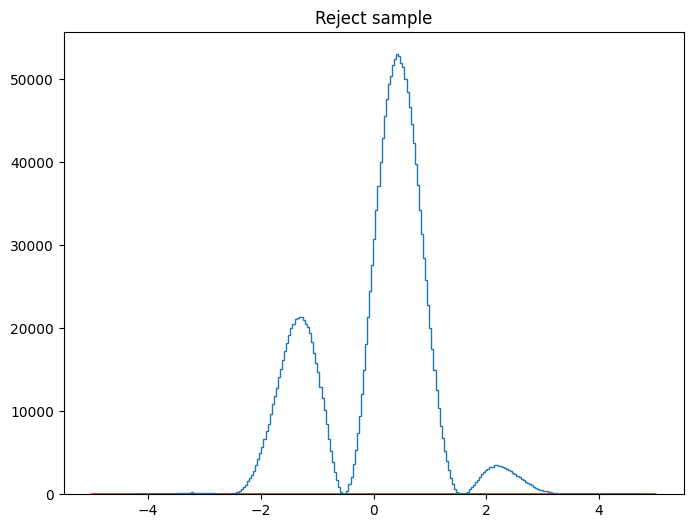

In [ ]:
def Rejet():
    X=np.random.randn()
    U=2*np.random.rand()
    while U>quotient(X):
            X=np.random.randn()
            U=2*np.random.rand()
    return X

Ech=[]
t = time()
while time()-t<tempsHM:
    Ech.append(Rejet())

m=len(Ech)
mR=np.mean(Ech)
eR=1.96*np.std(Ech)/np.sqrt(m)




plt.figure()
x=np.linspace(-Mplot,Mplot,int(1e4))
y=f(x)
plt.plot(x,y,"r")
plt.hist(Ech, bins=int(round(m**.38)), histtype="step") #,normed=1
plt.title("Reject sample")
plt.show()



In [ ]:
print("Facteur : HM->Rejet : "+str(m/float(n)))

print("\nEstimation la moyenne :")
print("Valeur reelle : %.3e" % mT)
print("Methode rejet : %.3e +/-%.3e" % (mR,eR))
print("Methode HM : %.3e +/-%.3e" % (mHM,eHM))